#Titanic!

The Titanic data is used in the project. This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.


VARIABLE DESCRIPTIONS:
survival        Survival(0 = No; 1 = Yes)
pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                
                
Titanic Data
What are the factors that made peopel to survive.
Does gender has effect on the rate of survival.
Does age has effect on the rate of survival.
Does have at least one sibiling aboard made people to survive.

#### 1. What is the independent variable in the experiment?
Gender,
Age,
and whether has at lease one sibiling

#### 2. What is the dependent variable in the experiment?
Rate of survial


#### 3. Definition of hypothesis

#### 4. Import libraries



In [88]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import seaborn as sns

#### 5. Loading file

In [15]:
with open(r'C:\Users\ares han\Documents\Learning\Udacity\Titanic\titanic_data.csv', 'r') as f:
    titanic = pd.read_csv(f)

#### 6. Inspect Data

Check table structure.

In [16]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S


Check data profile by describe() function

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the summary above, the value of age is in a reasonable range

Check how many rows in dataframe

In [8]:
len(titanic)

891

Check duplicates in PassengerId

In [47]:
titanic['PassengerId'].duplicated().sum()

0

Determine NaN values in each column, there are NaN values in column 'Age', 'Cabin' and 'Embarked'

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are NaN values in column Age which we will use to answer our question.

Check unique value for column 'Survived'. The reuslt looks good.

In [13]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Check unique value for column 'SibSp'. The reuslt looks good.

In [17]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### 6.  Create individual dataset for each question and drop missing data  

Create a dataset for investigating effect of Age

In [31]:
titanic_age = titanic[['PassengerId','Survived','Age']].copy()
titanic_age.head(1)

,PassengerId,Survived,Age
0,1,0,22


In [32]:
len(titanic_age)

891

Drop rows with NaN Value for Age

In [33]:
titanic_age = titanic_age[titanic_age.Age.notnull()]
len(titanic_age)

714

177 rows were dropped

Add three new columns Children, Adult and Elder to mark people who under 18(not include), between 18 and 60, and beyond 60(not include)

In [42]:
titanic_age['Children'] = titanic_age.Age <18
titanic_age['Adult'] = (titanic_age.Age >= 18) & (titanic_age.Age <= 60)
titanic_age['Elder'] = titanic_age.Age > 60
titanic_age.head(2)

,PassengerId,Survived,Age,Children,Adult,Elder
0,1,0,22,False,True,False
1,2,1,38,False,True,False



Create a dataset for investigating effect of Sex

In [34]:
titanic_sex = titanic[['PassengerId','Survived','Sex']].copy()
titanic_sex.head(1)

,PassengerId,Survived,Sex
0,1,0,male


Accoridng to output of step 'Inspect Data', there is no NaN value in column 'Sex'. So we done't need to drop any rows.

Create a dataset for investigating effect of whether has siblings

In [35]:
titanic_sibSp = titanic[['PassengerId','Survived','SibSp']].copy()
titanic_sibSp.head(1)

,PassengerId,Survived,SibSp
0,1,0,1


Add a new column to mark passenger who has at least one sibling aboard

In [44]:
titanic_sibSp['Has_SibSp'] = titanic_sibSp['SibSp'] >= 1
titanic_sibSp.head(1)

,PassengerId,Survived,SibSp,Has_SibSp
0,1,0,1,True


#### 7. Calculate rate of Survival

In [84]:
survival_rate_age = pd.DataFrame(0,index= ['children','adult','elder','total'],columns=['passenger','survival','survival_rate'])

survival_rate_age.at['total','passenger'] = len(titanic_age)
survival_rate_age.at['total','survival'] = titanic_age['Survived'].sum(axis = 'index')
survival_rate_age.at['children','passenger'] = (titanic_age['Children'] == True).sum()
survival_rate_age.at['children','survival'] = ((titanic_age['Survived'] == 1) & (titanic_age['Children'] == True)).sum()
survival_rate_age.at['adult','passenger']  = (titanic_age['Adult'] == True).sum()
survival_rate_age.at['adult','survival'] = ((titanic_age['Survived'] == 1) & (titanic_age['Adult'] == True)).sum()
survival_rate_age.at['elder','passenger'] = (titanic_age['Elder'] == True).sum()
survival_rate_age.at['elder','survival'] =  ((titanic_age['Survived'] == 1) & (titanic_age['Elder'] == True)).sum()
survival_rate_age['survival_rate']  = survival_rate_age.apply(lambda r: 100*float(r.survival)/r.passenger, axis = 'columns')
survival_rate_age

,passenger,survival,survival_rate
children,113,61,53.982301
adult,579,224,38.687392
elder,22,5,22.727273
total,714,290,40.616246


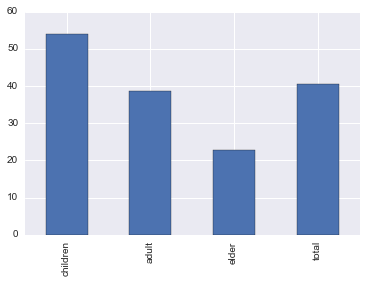

In [92]:
survival_rate_age['survival_rate'].transpose().plot(kind='bar')